## 단어(features) 벡터화

### 빈도 기반

- CountVectorizer
- TfidfVectorizer

### 임베딩

- Word2Vec
  - [ko_embeddings/word2vec](https://drive.google.com/drive/folders/1KRvGCS6KZSjyTNA9ccwzPikaC52-e242?usp=sharing)
- FastText
  - [ko_embeddings/fasttext-ko-100.bin](https://drive.google.com/file/d/1kYEqH1dVjkP7If2lqTxUyY-morOhLVRO/view?usp=sharing)
- Glove
  - [ko_embeddings/glove](https://drive.google.com/drive/folders/1RHGqVpP-KY8_DECd-C9xEsc-d6NfoCaP?usp=sharing)
    - glove-ko.txt
    - glove-ko-gensim.txt


### gensim 버전 관련 주의사항

gensim 4.x 에서 내부 자료구조가 바뀌면서 더 빠르고 메모리도 절약하도록 성능 향상됨<br/>
대신에 gensim 3.x 에서 생성된 모델을 사용할 수 없어서 모델과 코드에 대해 migration 작업이 필요하다.

- 구버전 wv 모델을 신버전 wv로 변경하는 방법은 없음 (해봤는데 안됨)
  - 구버전은 gensim==3.8.3 까지만 지원 (대부분의 모델이 여기에 해당됨)
    - `!pip install gensim==3.8.3 -U` 설치해서 사용
- 이외 코드 부분에서 중요 변경 사항
  - `model.wv.vectors.shape` ==> `model.vectors.shape`
  

__참고자료__

- [Migrating-from-Gensim-3.x-to-4](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4)

In [ ]:
# 설치전 gensim==3.6.0
!pip install gensim==3.8.3 -U

import gensim
gensim.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 65.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


'3.8.3'

## Word2Vec 임베딩

__사전학습모델 (Download)__

- [깃허브 ratsgo/embedding](https://github.com/ratsgo/embedding/releases/tag/v1.0.1)
  - 2019.07 [word-embeddings 다운로드](https://drive.google.com/file/d/1FeGIbSz2E1A63JZP_XIxnGaSRt7AhXFf/view)
  - [한국어 임베딩 튜토리얼](https://ratsgo.github.io/embedding/)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data")
!ls -l

Mounted at /gdrive
total 52701
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 25 09:17 submission_v2.csv
-rw------- 1 root root  188889 Jul 25 09:11 submission_v3.csv
-rw------- 1 root root  188889 Jul 25 13:52 submission_v4.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


In [ ]:
!ls -l /gdrive/MyDrive/Colab\ Notebooks/제주ICT-AI분석반-쇼핑몰분석/ko-embeddings/word2vec*

total 302685
-rw------- 1 root root  23514102 May 17  2019 word2vec-ko
-rw------- 1 root root 143217328 May 17  2019 word2vec-ko.trainables.syn1neg.npy
-rw------- 1 root root 143217328 May 17  2019 word2vec-ko.wv.vectors.npy


In [ ]:
# conda create --name env-py3.8 python=3.8 numpy=1.19.5
# conda activate old-py3.8

import gensim
from gensim.models import Word2Vec, KeyedVectors

# gensim.version= 3.8.3
print('gensim.version=', gensim.__version__)

ko_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/ko-embeddings"

# 깃허브 ratsgo/embedding
wv_path = ko_path+'/word2vec/word2vec-ko'
ko_model = gensim.models.Word2Vec.load(wv_path)

print(ko_model.wv.vectors.shape)
# (358043, 100)

print(ko_model.wv.most_similar('강아지', topn=7))
# ../models/word2vec-ko.bin
# [('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223750114441), 
# ('멧돼지', 0.6950401067733765), ('엄마', 0.693433403968811), ('난쟁이', 0.6806551218032837), 
# ('한마리', 0.6770296096801758)]

# ../models/ko-embeddings/word2vec/word2vec-ko
# [('고양이', 0.8470748662948608), ('애완견', 0.7790216207504272), ('잉꼬', 0.7730404138565063), 
# ('엄마', 0.7725179195404053), ('아기', 0.7709106206893921), ('토끼', 0.7708439230918884), 
# ('애완', 0.7673066854476929)]

ko_model.wv.most_similar(positive=['한국', '도쿄'], negative=['서울'])[:7]
# [('일본', 0.7388617396354675), ('고이즈미', 0.5852372646331787), ('히데오', 0.5634008646011353),
#  ('오키나와', 0.5536357164382935), ('노무라', 0.5533076524734497), ('미국', 0.5443052649497986),
#  ('홋카이도', 0.544133722782135)]

gensim.version= 3.8.3
(358043, 100)
[('고양이', 0.8470748662948608), ('애완견', 0.7790216207504272), ('잉꼬', 0.7730404138565063), ('엄마', 0.77251797914505), ('아기', 0.7709106206893921), ('토끼', 0.7708439230918884), ('애완', 0.7673067450523376)]


[('일본', 0.7388617396354675),
 ('고이즈미', 0.5852372646331787),
 ('히데오', 0.56340092420578),
 ('오키나와', 0.5536357760429382),
 ('노무라', 0.5533076524734497),
 ('미국', 0.5443052649497986),
 ('홋카이도', 0.544133722782135)]

In [ ]:
# gensim으로 학습된 단어 임베딩을 케라스에서 불러오기
# 참고: http://doc.mindscale.kr/km/unstructured/11.html

import numpy as np
from keras.models import Sequential
from keras.layers import Embedding

NUM_WORDS, EMB_DIM = ko_model.wv.vectors.shape

emb = Embedding(input_dim=NUM_WORDS, output_dim=EMB_DIM,
                trainable=False, weights=[ko_model.wv.vectors])

net = Sequential()
net.add(emb)

i = ko_model.wv.index2word.index('강아지')

print( net.predict([i])[0] )  # 2D-array 라서 [0] 붙임
print( ko_model.wv['강아지'] )

# ndarray 비교: True (똑같다)
np.array_equal(net.predict([i])[0], ko_model.wv['강아지'], equal_nan=True)

[ 0.33154958  0.3874034   0.04646752 -0.32610524 -0.09718167  0.5636505
 -0.00771978 -0.10074466  0.26554248 -0.41748476 -0.2019255   0.23903592
  0.38667247 -0.00616947  0.0217422   0.44818774  0.7703485   0.5868009
  0.33006248 -0.02899008  0.605486    0.22029044  0.07487072  0.19667199
 -0.17349489  0.46173656  0.09597785 -0.15150213 -0.14268404 -0.17972931
 -0.20394789 -0.22509854  0.1012596   0.02203737 -0.2701539   0.01427667
 -0.77580667 -0.1013597   0.17622885 -0.10018618 -0.04378976 -0.23734729
  0.24881615  0.29180545 -0.19752023 -0.06553038  0.3298503  -0.1571141
 -0.30158982 -0.34747523  0.72965014  0.03369655  0.00172826 -0.3686897
  0.05099787  0.00768718 -0.37791446 -0.33766606  0.05133962  0.10959289
 -0.12624855 -0.16423409  0.28505665  0.4862273   0.15137047  0.5613734
  0.61055    -0.32623583  0.399212    0.06002958  0.11912944 -0.8238192
  0.26060817 -0.05989209 -0.10020499  0.23319831  0.01740226  0.03424889
  0.32255635 -0.4838013  -0.06026441 -0.27414426  0.04063

True

## 데이터 불러오기

In [ ]:
import pandas as pd

# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# Okt 토크나이징
# ==> NaN, 한글자 제거 (rows=24981)
file_path = f'{data_path}/train_okt_stem.csv'

## Pickle 로딩
train_df = pd.read_csv(file_path)
# train_df = train_df.drop(['Unnamed: 0'], axis='columns')
print(train_df.shape)

train_df
# 24984 rows × 8 columns

(24984, 8)


,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음 구입 싸게 햇 어 요,좋다 처음 구입 싸다 하다,7,5,10
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른지 하루 밖에 안 됐는데 25천원 가량 주고 사기 ...,생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다,17,13,26
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮은데 상품 이 금 이 가서 교환 했는데 두번째 받은 상품 도 까져있고...,디자인 괜찮다 상품 금 가다 교환 하다 두번째 받다 상품 끄다 안쪽 금 가다 귀찮다...,28,21,46
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말고 이마트 트 레이더스 에서만 팔던 프리미엄 제품 을 사용 했었...,기전 이 제품 이마트 트 레이더스 파다 프리미엄 제품 사용 하다 샘플 써다 보고 마...,53,39,82
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목 을 잘 받쳐주네요 ~,튼튼하다 손목 자다 받치다,6,4,11
...,...,...,...,...,...,...,...,...
24979,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무 너무 좋은데 지속 력 만 좋다면 좋겠지만 .. 워낙 저렴해 그래도...,일단 향 너무 너무 좋다 지속 력 좋다 좋다 워낙 저렴하다 그래도좋아,16,12,27
24980,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체 에서 발송 하고 한 상자 로 배송 되었는데 택배 비는 이중 처리 되었습...,동일하다 업체 발송 하다 상자 배송 되어다 택배 비다 이중 처리 되어다,16,12,28
24981,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋아요 !! 다른 향 도 시켜 보고 싶어요,향 좋다 다른 향 시키다 보고 싶다,10,7,13
24982,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보니 끝 부분 쯤 에 50 cm 정도 찟어져 있습니다 날짜 관계 로 구 냥 사...,펼치다 보다 끝 부분 쯤 정도 찟어져 있다 날짜 관계 구 사용 하다,18,13,25


In [ ]:
# LSTM 모델의 출력에 대응하는 target 전처리 : Dim=(None, 5)
# ==> 후처리 시에는 np.argmax([0.0, 0.0, 0.0, 0.0, 1.0])+1 => 5 
#
# target 전처리 https://stackoverflow.com/a/43314437
# target 후처리 https://stackoverflow.com/a/38845674

from keras.utils import np_utils
train_df['t_cate'] = train_df['target'].apply(lambda v: np_utils.to_categorical(v-1, num_classes=5, dtype='float16'))
train_df[['target','t_cate']]

,target,t_cate
0,2,"[0.0, 1.0, 0.0, 0.0, 0.0]"
1,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
2,2,"[0.0, 1.0, 0.0, 0.0, 0.0]"
3,2,"[0.0, 1.0, 0.0, 0.0, 0.0]"
4,5,"[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...
24979,5,"[0.0, 0.0, 0.0, 0.0, 1.0]"
24980,2,"[0.0, 1.0, 0.0, 0.0, 0.0]"
24981,4,"[0.0, 0.0, 0.0, 1.0, 0.0]"
24982,2,"[0.0, 1.0, 0.0, 0.0, 0.0]"


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

data = train_df
X_train, X_test, y_train, y_test = train_test_split(
    data[ ['reviews','pos_tokens'] ], 
    data['t_cate'],   # target 대신에 t_cate 사용
    test_size=0.2, 
    random_state=42, 
#     shuffle=True, 
    stratify=data['target']     # 클래스 비율 유지
)

# 동일한 float dtype으로 통일되도록 np.array로 재생성
# ==> 이거 안하면 object 타입으로 인식됨
y_train = np.array( y_train.to_list(), dtype='float16')
print( 'y_train:', type(y_train), y_train.dtype, y_train.shape, y_train[0] )
y_test = np.array( y_test.to_list(), dtype='float16')
print( 'y_test :', type(y_test), y_test.dtype, y_test.shape, y_test[0] )
print()


# 크기를 확인합니다.
print( 'train 데이터 셋 모양 :', X_train.shape, y_train.shape)
print( 'test 데이터 셋 모양 :', X_test.shape, y_test.shape)
# train 데이터 셋 모양 : (19987, 2) (19987,)
# test 데이터 셋 모양 : (4997, 2) (4997,)

y_train: <class 'numpy.ndarray'> float16 (19987, 5) [0. 1. 0. 0. 0.]
y_test : <class 'numpy.ndarray'> float16 (4997, 5) [0. 0. 0. 1. 0.]

train 데이터 셋 모양 : (19987, 2) (19987, 5)
test 데이터 셋 모양 : (4997, 2) (4997, 5)


In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

tf.random.set_seed(42)

### 문서 100 건에 대해 임베딩 테스트 

In [ ]:
# 평점 1과 5에서 pos_tokens 를 문장으로 추출
n_doc=100
sentences = train_df[ train_df['target']==1 ].iloc[:n_doc,4].tolist() + train_df[ train_df['target']==5 ].iloc[:n_doc,4].tolist()
print(len(sentences), sentences[0])

tokenizer = Tokenizer()  # keras
tokenizer.fit_on_texts(sentences)

200 생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다


In [ ]:
# 단어 집합(vocab)의 크기를 입력합니다. 패딩(<pad>)을 고려하여 tokenizer의 단어 수에서 +1 해줍니다.
vocab_size = len(tokenizer.word_index) + 1
print('vocab_size =', vocab_size)   # 1004

# 단어 대신에 시퀀스(단어 번호)로 변환
X_encoded = tokenizer.texts_to_sequences(sentences)

max_len = max(len(sent) for sent in X_encoded)
avg_len = np.mean([len(sent) for sent in X_encoded], dtype=int)
print( 'docs_size=', len(X_encoded))
print( 'max_terms_size=', max_len)  # 43
print( 'avg_terms_size=', avg_len)  # 11

vocab_size = 1004
docs_size= 200
max_terms_size= 43
avg_terms_size= 11


In [ ]:
# 패딩
maxlen_pad = 30
X_train_vec=pad_sequences(X_encoded, maxlen=maxlen_pad, padding='post')

np.shape(X_train_vec)  # 200, 30

(200, 30)

In [ ]:
# Tokenizer 에 의해 시퀀스 변환된 벡터를 문장으로 다시 복원하여 출력
def decode_tkn_vector(word_index, text_vec):
    """
    word_index 를 받아서 text 를 sequence 형태로 반환하는 함수입니다.

    Args:
      word_index: tokenizer.word_index
      text_vec: 텍스트 시퀀스 -> str
    """
    reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])
    return ' '.join([reverse_word_index.get(i, '?') for i in X_train_vec[0] if i > 0]) # 패딩=0


# 시퀀스 복원 테스트
decode_tkn_vector(tokenizer.word_index, X_train_vec[0])

'생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다'

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))  # worc2vec.size=100
print(np.shape(embedding_matrix))

# vocab 의 word 들에 대해 wv 의 임베딩 벡터를 복사
# - 그런데 이거 왜 하나? 사이즈 줄여서 시간과 메모리 절약하려고??
oov_tokens = []
for word, i in tokenizer.word_index.items():
  if word in ko_model.wv:
    embedding_matrix[i] = ko_model.wv[word]
  else:
    if len(oov_tokens) < 50:
      if len(oov_tokens)>0 and not len(oov_tokens)%10: print()
      print(word, end=', ')
    oov_tokens.append(word)

print('\n==> oov_cnt=', len(oov_tokens))  # 단어 278 개가 wv에 없음

# 선호도를 추정할 핵심 단어들인데, wv에 없다. 어쩌지?? 
# ==> word2vec 만들어서 써야 함. 아니면 추가 훈련
assert '좋다' not in ko_model.wv


(1004, 100)
좋다, 있다, 재다, 같다, 되다, 빠르다, 않다, 버리다, 보내다, 받다, 
깔끔하다, 안되다, 싸다, 작다, 먹다, 맛있다, 써다, 맞다, 이쁘다, 나오다, 
걸리다, 쓸다, 붙이다, 시키다, 아니다, 편하다, 감사하다, 사먹다, 좋아하다, 괜찮다, 
불편하다, 아프다, 튼튼하다, 저렴하다, 돼다, 그렇다, 터지다, 들다, 깨다, 입다, 
많다, 아깝다, 이렇다, 뜯다, 넘다, 귀찮다, 기다리다, 닿다, 느리다, 얇다, 
==> oov_cnt= 278


In [ ]:
## embedding_matrix 로 문장 시퀀스를 wv 임베딩 테스트

EMB_DIM = ko_model.wv.vector_size

model = Sequential()
embedding_layer = Embedding(vocab_size, EMB_DIM, weights=[embedding_matrix],input_length=maxlen_pad)
model.add(embedding_layer)
model.compile('adam','mse')

input_data = np.array([ X_train_vec[0] ])
pred = model.predict(input_data)
print(input_data)  # 입력: 문장 시퀀스
print(pred)        # 출력: wv 으로 임베딩된 매트릭스


[[ 42   3   9  96 353 188 126   9  96 127 189   4 128   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
[[[ 0.08488914  0.5831939  -0.16759951 ...  0.37500262 -0.00306227
   -0.05402162]
  [ 0.1018862   0.46182787 -0.15744843 ...  0.13554615 -0.01283629
   -0.22849104]
  [ 0.14043704  0.10932247 -0.38540056 ...  0.05181919  0.01093013
    0.36314446]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]]


### 추가 학습된 Word2Vec 로딩

아래 추가학습 과정을 수행한 경우 모델을 바로 불러오자.

In [ ]:
ko_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/ko-embeddings"

# ratsgo 기존 모델 + Okt-stem 처리된 코퍼스로 추가 학습
wv_path = ko_path+"/wv_ko_new.bin"
wv_model = gensim.models.Word2Vec.load(wv_path)

print(wv_model.wv.vectors.shape)
# (13123, 100)

(13123, 100)


### Word2Vec 추가 학습

기존 wv 모델에 단어가 부족해 사용하기 어렵다. ex) 좋아요, 재구매, 빠르고, 샀는데<br/>
추가 학습으로 약 200개 oov 단어를 추가했다 (이정도면 OK?)

- oov_tokens[253] are appended: oov_remains=56
  - 남은 단어: ex) 골아서,썩은내가,변해있더라구요,선해요,쌀듯,스텐마감,걸려다,텐마,그리며,가했다,뭄루느,여는데,빠져나오고,거칠거칠하고,보내는거,터질것,담았나,통찜,맛있었던,먹는건, ...

#### 참고

- [Word2Vec 단어 추가 및 학습시키는 방법](https://www.infoking.site/16)
- [11) 문서벡터를 이용한 추천시스템 - 2. 사전 훈련된 워드 임베딩 사용하기](https://wikidocs.net/102705)
- [gensim - tutorial - word2vec - GoogleNews](https://frhyme.github.io/python-libs/gensim0_word2vec_1google_model/)

In [ ]:
from nltk.tokenize import RegexpTokenizer
import nltk

text = '생각 잘 안 돼요 매지 바른지 하루 안 됐는데 주고 사기 너무 아깝네요'

# 한글 토큰만 파싱 하는 기본 토큰나이저
re_tokenizer = RegexpTokenizer(r'[가-힣]+')
print( re_tokenizer.tokenize( text ) )

['생각', '잘', '안', '돼요', '매지', '바른지', '하루', '안', '됐는데', '주고', '사기', '너무', '아깝네요']


In [ ]:
# 기본 토크나이저로 corpus 생성 (list of tokens)
train_df['tokens_arr'] = train_df['pos_tokens'].apply( re_tokenizer.tokenize )

# train 전체 문서에 대해 corpus 추출 (list of sentences)
corpus = train_df['tokens_arr'].tolist()

# len = 24984
print(len(corpus), corpus[0])

24984 ['좋다', '처음', '구입', '싸다', '하다']


In [ ]:
!pwd
# 1) 기존 모델을 파일로 저장
temp_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp"
ko_model.wv.save_word2vec_format(temp_path+"/ko.bin.gz", binary=False)

/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data


In [ ]:
sum(1 for _ in ko_model.wv.vocab.keys())

358043

In [ ]:
# 참고
# https://frhyme.github.io/python-libs/gensim0_word2vec_1google_model/

# 1) 새로운 word2vec 모델 생성
wv_model = Word2Vec(
    sentences=corpus,
    size=ko_model.wv.vector_size, 
    window=2, min_count=2, workers=-1
    )
print( '1) created', sum(1 for _ in wv_model.wv.vocab.keys()) )  # =>  7874

# 2) UPDATE vocab by 기존 모델 word Vocabulary
wv_model.build_vocab(ko_model.wv.vocab.keys(), update=True)
print( '2) updated', sum(1 for _ in wv_model.wv.vocab.keys()) )  # => 13123

# 3) INITIALIZED word vector 
# lockf=1.0 : update lock이 걸려 있는 vector를 풀어준다
temp_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp"
wv_model.intersect_word2vec_format(
    temp_path+"/ko.bin.gz", binary=False, lockf=1.0
)
print( '3) initialized:', sum(1 for _ in wv_model.wv.vocab.keys()) )  # => 13123

# 4) TRAIN new corpus
print("== Before New corpus training")
print('origin:', wv_model.wv.vectors.shape)
wv_model.train( corpus, total_examples=len(corpus), epochs=100)
print("==  After New corpus training")
print('merged:', wv_model.wv.vectors.shape)
# ==> (13123, 100)

# 5) save new model
ko_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/ko-embeddings"
wv_model.save(ko_path+"/wv_ko_new.bin")

1) created 7874
2) updated 13123


3) initialized: 13123
== Before New corpus training
origin: (13123, 100)


==  After New corpus training
merged: (13123, 100)


In [ ]:
oov_cnt = 0
for oov in oov_tokens:
  if oov not in wv_model.wv:
    if oov_cnt < 20: print(oov, end=', ')
    oov_cnt += 1

# 약 251개 oov 단어를 추가했다. stem 덕분이다. (이정도면 OK)
# oov_tokens[253] are appended: oov_remains=27
print(f'\n==> oov_tokens[{len(oov_tokens)-oov_cnt}] are appended: oov_remains={oov_cnt}')

선하다, 스텐마감, 텐마, 깨어나다, 뭄루느, 통찜, 바들바들, 비싼덴, 포메, 늠데, 헤갈리, 운영자, 거잭, 뉺낭뉴, 맘데, 어쩝, 불투명하다, 맛운, 불칠절해, 펌핑식, 
==> oov_tokens[251] are appended: oov_remains=27


In [ ]:
# check embedding result
# 긍정?
print(wv_model.wv.most_similar(positive=["좋다"], topn=5))
print(wv_model.wv.most_similar(positive=["부드럽다"], topn=5))
# 부정?
print(wv_model.wv.most_similar(positive=["나쁘다"], topn=5))
print(wv_model.wv.most_similar(positive=["약하다"], topn=5))
# 모호?
print(wv_model.wv.most_similar(positive=["별로"], topn=5))
print(wv_model.wv.most_similar(positive=["좋다",'품질'], negative=['약하다'], topn=5))

# 그닥 잘 된거 같지 않다 (-_-)

[('번째', 0.3738844692707062), ('중국산', 0.3601164221763611), ('채', 0.34241461753845215), ('돼', 0.34090733528137207), ('헐', 0.33829134702682495)]
[('대로', 0.3669995069503784), ('쭉', 0.35161149501800537), ('뽐', 0.3406085669994354), ('멓', 0.3195464015007019), ('툭', 0.3173389136791229)]
[('디지다', 0.3381768465042114), ('비굿', 0.3202265501022339), ('선', 0.3063849210739136), ('도아', 0.2995815873146057), ('메이크업', 0.2894003391265869)]
[('뽑히다', 0.3333512842655182), ('땝', 0.328929603099823), ('건지다', 0.3156279921531677), ('續', 0.3057284951210022), ('例', 0.30012938380241394)]
[('그닥', 0.862446665763855), ('별루', 0.8195787668228149), ('꽤', 0.8144615888595581), ('그래도', 0.7956805229187012), ('그다지', 0.7881661653518677)]
[('공산품', 0.4844430685043335), ('통관', 0.4722256660461426), ('농약', 0.4709617495536804), ('안전', 0.4621501863002777), ('헹굼', 0.45823991298675537)]


### 평점 분류 초간단 임베딩 모델

소스 [감성 분석 딥러닝 모델 생성 - TextVectorization](https://tech-diary.tistory.com/8)

__참고__

- [딥러닝을 이용한 자연어처리 입문 - 6) 네이버 영화 리뷰 감성 분류하기](https://wikidocs.net/44249)
- [Movie Ratings Prediction Server using Flask and LSTM in Keras (Part 1)](https://medium.com/analytics-vidhya/movie-ratings-prediction-server-using-flask-and-lstm-in-keras-part-1-90933e8dbf88)

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

tokenizer = Tokenizer()  #num_words = 13123)
tokenizer.fit_on_texts(X_train['pos_tokens'])

# 단어 집합(vocab)의 크기를 입력합니다. 패딩(<pad>)을 고려하여 tokenizer의 단어 수에서 +1 해줍니다.
vocab_size = len(tokenizer.word_index) + 1
print('vocab_size =', vocab_size)

# 단어 대신에 시퀀스(단어 번호)로 변환
X_encoded = tokenizer.texts_to_sequences(X_train['pos_tokens'])

max_len = max(len(sent) for sent in X_encoded)
avg_len = np.mean([len(sent) for sent in X_encoded], dtype=int)
print( 'docs_size=', len(X_encoded))
print( 'max_terms_size=', max_len)
print( 'avg_terms_size=', avg_len)

vocab_size = 12962
docs_size= 19987
max_terms_size= 51
avg_terms_size= 11


In [ ]:
# 패딩
maxlen_pad = 30
X_train_vec= pad_sequences(X_encoded, maxlen=maxlen_pad, padding='post')

print( np.shape(X_train_vec), np.shape(y_train) )
# (19986, 30) (19986,)
y_train[0]

(19987, 30) (19987, 5)


array([0., 1., 0., 0., 0.], dtype=float16)

In [ ]:
# X_test 에 대해서도 동일 작업
X_encoded = tokenizer.texts_to_sequences(X_test['pos_tokens'])
X_test_vec = pad_sequences(X_encoded, maxlen=maxlen_pad, padding='post')

print( np.shape(X_test_vec), np.shape(y_test) )
# (4997, 30) (4997,)
y_test[0]

(4997, 30) (4997, 5)


array([0., 0., 0., 1., 0.], dtype=float16)

In [ ]:
# wv_model 로 임베딩 가중치 매트릭스 다시 생성

embedding_matrix = np.zeros((vocab_size, 100))  # worc2vec.size=100
print('embedding_matrix=', np.shape(embedding_matrix))

# vocab 의 word 들에 대해 wv 의 임베딩 벡터를 복사
# - 그런데 이거 왜 하나? 사이즈 줄여서 시간과 메모리 절약하려고??
oov_cnt = 0
for word, i in tokenizer.word_index.items():
  if word in wv_model.wv:
    embedding_matrix[i] = wv_model.wv[word]
  else:
    if oov_cnt < 50: 
      print(word, end=', ')
      if oov_cnt>0 and not oov_cnt%10: print()
    oov_cnt += 1

print('\n==> oov_cnt=', oov_cnt, ', EMB_LEN=', np.shape(embedding_matrix)[0] - oov_cnt)  # 단어 15086 개가 wv에 없음

assert '좋다' in wv_model.wv


embedding_matrix= (12962, 100)
정적, 열쇠, 그닥임, 구깃구깃, 오즈, 위고, 날로, 니모, 승승장구, 회보, 드셧, 
산성, 꿇다, 누운, 냛, 금고, 마구마구, 생겨나다, 측정기, 년월, 오색, 
낮아지다, 싸가지, 하품, 요란하다, 벽끝, 무맛, 옛말, 삼선, 변통, 아빅, 
피톤, 치드, 포름알데히드, 프라임, 강상, 졍보, 리스트, 썻어용, 어린시절, 호박고구마, 
물컹거리, 정품벌, 애혀, 헨해니뫃, 주마, 증기, 흐늘, 딴사람, 잘썻슷니, 
==> oov_cnt= 5066 , EMB_LEN= 7896


In [ ]:
# 모델 훈련 전에 타입 확인

print( 'X_train_vec:', type(X_train_vec), X_train_vec.dtype, X_train_vec.shape, np.isnan(np.sum(X_train_vec)))
print( 'X_test_vec :', type(X_test_vec), X_test_vec.dtype, X_test_vec.shape, np.isnan(np.sum(X_test_vec)))
print( 'y_train    :', type(y_train), y_train.dtype, y_train.shape, np.isnan(np.sum(y_train)))
print( 'y_test     :', type(y_test), y_test.dtype, y_test.shape, np.isnan(np.sum(y_test)))

# dtype='object'로 표시되면 안됨!! (오류 발생)
# => ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

X_train_vec: <class 'numpy.ndarray'> int32 (19987, 30) False
X_test_vec : <class 'numpy.ndarray'> int32 (4997, 30) False
y_train    : <class 'numpy.ndarray'> float16 (19987, 5) False
y_test     : <class 'numpy.ndarray'> float16 (4997, 5) False


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(42)

temp_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp"
EMB_DIM = wv_model.wv.vector_size
hidden_units = 100

# https://medium.com/analytics-vidhya/movie-ratings-prediction-server-using-flask-and-lstm-in-keras-part-1-90933e8dbf88

# 모델
model = Sequential()
embedding_layer = Embedding(vocab_size, EMB_DIM, weights=[embedding_matrix], input_length=maxlen_pad, trainable=False)
model.add(embedding_layer)
model.add(LSTM(hidden_units))  #, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50, input_dim=hidden_units, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# 콜백
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(temp_path+'/best_rnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 옵션: rmsprop/adam, categorical_crossentropy
model.compile(  # optimizer='adam'
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.89)
    , loss='categorical_crossentropy', metrics=['acc']
    )

# 훈련
history = model.fit(X_train_vec, y_train, epochs=30, callbacks=[es, mc], batch_size=64, validation_data=(X_test_vec, y_test), verbose=2)

Epoch 1/30

Epoch 1: val_acc improved from -inf to 0.51851, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 16s - loss: 1.2356 - acc: 0.4545 - val_loss: 1.1306 - val_acc: 0.5185 - 16s/epoch - 50ms/step
Epoch 2/30

Epoch 2: val_acc improved from 0.51851 to 0.52211, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 13s - loss: 1.1287 - acc: 0.5272 - val_loss: 1.1086 - val_acc: 0.5221 - 13s/epoch - 41ms/step
Epoch 3/30

Epoch 3: val_acc improved from 0.52211 to 0.53812, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 13s - loss: 1.0873 - acc: 0.5444 - val_loss: 1.0710 - val_acc: 0.5381 - 13s/epoch - 41ms/step
Epoch 4/30

Epoch 4: val_acc improved from 0.53812 to 0.54893, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 13s - loss: 1.0602 - acc: 0.5

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model(temp_path+'/best_rnn.h5')

# test 평가
# val_loss=1.0209, val_acc=0.5745 (LSTM, dropout=0.2)
# val_loss=1.0417, val_acc=0.5683 (LSTM-relu, dropout=0.2)
# val_loss=1.0359, val_acc=0.5713 (LSTM-relu, dropout=0.4, dropout=0.2)
# val_loss=1.0260, val_acc=0.5773 (LSTM-relu, dropout=0.2, dropout=0.2)
val_loss, val_acc = loaded_model.evaluate(X_test_vec, y_test)
print(f'val_loss={val_loss:.4f}, val_acc={val_acc:.4f}')

157/157 [==============================] - 2s 12ms/step - loss: 1.0260 - acc: 0.5773
val_loss=1.0260, val_acc=0.5773


## 제출용 테스트 데이터 생성


In [ ]:
import pandas as pd

# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# Okt 토크나이징 데이터 로딩
# ==> NaN, 한글자 제거 (rows=24986)
test_df = pd.read_csv(f'{data_path}/test_okt_stem.csv')
test_df

,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26
...,...,...,...,...,...,...,...
24984,24995,사용해보니 좋아요~^^,사용 해보니 좋아요 ~^^,사용 해보다 좋다,4,3,7
24985,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격 에 . 질 좋고 . 핏좋 고 . 너무 . 이쁘게 . 입고 다녀요 ..,저렴하다 가격 질 좋다 핏좋 너무 이쁘다 입다 다니다,17,9,21
24986,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품 이라고 써있어서 그런줄 알 고 구매 했더니 단 품 이었네요 낚 인 느낌 ...,세트 상품 써다 그렇다 알 구매 하다 단 품 이다 낚 느낌 들다 그렇다 딘품 표시 ...,40,31,55
24987,24998,역시 로네펠트!! 좋아요.,역시 로 네 펠트 !! 좋아요 .,역시 로 네 펠트 좋다,7,5,8


In [ ]:
# X_test 에 대해서도 임베딩(시퀀스+패딩) 작업
Z_encoded = tokenizer.texts_to_sequences(test_df['pos_tokens'])
Z_test_vec = pad_sequences(Z_encoded, maxlen=maxlen_pad, padding='post')

print( Z_test_vec.dtype, np.shape(Z_test_vec) )
# int32, (24988, 30)

int32 (24989, 30)


In [ ]:
# 예측값 생성
pred_cate = loaded_model.predict(Z_test_vec)
print( pred_cate.dtype, np.shape(pred_cate), pred_cate[0] )
# float32 (24989, 5) 
# [4.1685391e-02 2.2301321e-01 4.8615730e-05 2.5124931e-01 4.8400342e-01]

# 후처리 예제
# np.argmax([0.0, 0.0, 0.0, 0.0, 1.0])+1 => 5 
# np.argmax([4.1685391e-02, 2.2301321e-01, 4.8615730e-05, 2.5124931e-01, 4.8400342e-01])+1 => 5

float32 (24989, 5) [5.9631769e-02 3.6964458e-01 1.2235811e-05 2.5466484e-01 3.1604660e-01]


In [ ]:
# 예측값 후처리: pred_cate => pred_target
pred_target = np.array([ np.argmax(cate)+1 for cate in pred_cate ], dtype='int8')
print( pred_target.dtype, np.shape(pred_target), pred_target[0] )

# 예측값 저장
test_df['pred_target'] = pred_target.tolist()
test_df.head()

int8 (24989,) 2


,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize,pred_target
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50,1
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25,2
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26,1


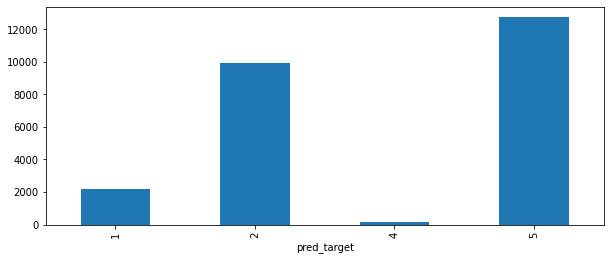

In [ ]:
# 예측값
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

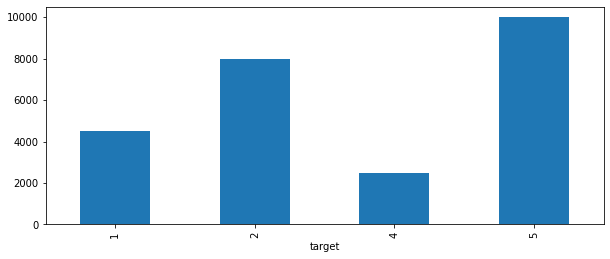

In [ ]:
# 훈련용 실제값
train_df.groupby('target').count()['id'].plot.bar(figsize=(10,4))

In [ ]:
# 제출용 파일 불러오기
submission = pd.read_csv(f'{data_path}/sample_submission.csv') 
print(submission.info())

# df1.join(df2) : 기본적으로 left join
# pd.merge(df1, df2, left_index=True, right_index=True) : 기본 inner join
# pd.concat([df1, df2], axis=1) : 기본 outer join

# left join: drop 된 rows 은 NaN 처리
submission_pred = pd.merge( 
    submission, 
    test_df[['id','pred_target']], 
    on='id',
    how='left'       # left, outer, right
    )
print('after MERGE:', submission_pred.shape )

# left join 으로 인한 NaN 조회
print(submission_pred.isna().sum())

# NaN 행 확인 (삭제되었던 11개 행 맞음)
submission_pred[ submission_pred.isna().any(axis=1) ]

# merge 되면서 pred_target 이 float 로 바뀌었음 (왜지?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   target  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB
None
after MERGE: (25000, 3)
id              0
target          0
pred_target    11
dtype: int64


,id,target,pred_target
790,790,0,NaN
1932,1932,0,NaN
2989,2989,0,NaN
6621,6621,0,NaN
8241,8241,0,NaN
10889,10889,0,NaN
10901,10901,0,NaN
11422,11422,0,NaN
11881,11881,0,NaN
21228,21228,0,NaN


In [ ]:
# NaN 값을 포함한 컬럼의 형 변환시에는
# nullable 가능한 pd.Int64Dtype() 으로 바꿔야 가능
submission_pred['target'] = submission_pred['pred_target'].astype('Int8')

# 기존 target 컬럼 삭제
submission_pred = submission_pred.drop(columns=['pred_target'])

# 확인
submission_pred.dtypes

# **참고: 컬럼 이름 변경 
# submission_pred = submission_pred.rename(columns={'pred_target' : 'target'})

id        int64
target     Int8
dtype: object

In [ ]:
import pandas as pd
data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# submission.csv 저장
submission_pred.to_csv(data_path+'/submission_v4.csv', index=False, encoding='utf-8')

# ==> 채점 0.647 ()

## Keras Tuner 최적화

In [ ]:
import tensorflow as tf
from tensorflow import keras

import IPython

In [ ]:
!pip install -q -U keras-tuner

# deprecated!
# import kerastuner as kt
# ==>
import keras_tuner as kt

     |████████████████████████████████| 135 kB 5.2 MB/s 


In [ ]:
# from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GlobalMaxPooling1D
tf.random.set_seed(42)

temp_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp"
EMB_DIM = wv_model.wv.vector_size
hidden_units = 100

def model_builder(hp):
    # 모델
    model = tf.keras.models.Sequential()

    embedding_layer = tf.keras.layers.Embedding(vocab_size, EMB_DIM, weights=[embedding_matrix], input_length=maxlen_pad, trainable=False)
    model.add(embedding_layer)
    model.add(tf.keras.layers.LSTM(hidden_units))  #, activation='relu'))

    # 최적 Drop rate ==> 3 가지
    hp_drate = hp.Float('dropout_rate',min_value=0.1,max_value=0.5,step=0.2)
    model.add(tf.keras.layers.Dropout(hp_drate))

    # 최적 노드수 찾기 (32간격) ==> 16 가지
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(tf.keras.layers.Dense(units=hp_units, input_dim=hidden_units, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    # 최적 학습률 찾기 (4중에 하나) ==> 3 가지
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    # 옵션
    model.compile(  # optimizer='adam'
        # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.89)
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
        , loss='categorical_crossentropy', metrics=['acc']
        )

    # 조합수 144 = 3 * 16 * 3
    return model

In [ ]:
# 최대 수행 횟수 지정 + 조기 종료
# 탐색 조건: 검증 정확도
tuner = kt.Hyperband(
    model_builder,
    objective = 'val_acc',   # Key error: 'val_accuracy'
    max_epochs = 10,
    factor = 3,
    directory = temp_path,
    project_name = 'review_rnn')


class ClearTrainingOutput(tf.keras.callbacks.Callback):
    # 훈련 한번 끝날 때마다, 출력 지우기
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

INFO:tensorflow:Reloading Oracle from existing project /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/review_rnn/oracle.json
INFO:tensorflow:Reloading Tuner from /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/review_rnn/tuner0.json


In [ ]:
# 조합수 48까지 시도 ==> 30회에서 조기 종료
tuner.search(
    X_train_vec, y_train, 
    epochs = 10,    # 생성시 지정한 max_epochs 는??
    validation_data = (X_test_vec, y_test), 
    callbacks = [ClearTrainingOutput()]
)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print("하이퍼 파라미터 검색이 완료되었습니다")
print('dropout_rate=', best_hps.get('dropout_rate'))
print('units=', best_hps.get('units'))
print('learning_rate=', best_hps.get('learning_rate'))
print()
print(best_hps.get_config())

# Best val_acc So Far: 0.5803
# Total elapsed time: 00h 33m 56s (30~40분)
# 하이퍼 파라미터 검색이 완료되었습니다
# dropout_rate= 0.3
# units= 448
# learning_rate= 0.001

Trial 42 Complete [00h 04m 25s]
val_acc: 0.5431258678436279

Best val_acc So Far: 0.5803481936454773
Total elapsed time: 00h 33m 56s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


하이퍼 파라미터 검색이 완료되었습니다
dropout_rate= 0.30000000000000004
units= 448
learning_rate= 0.001


In [ ]:
# 원글에서는 은닉층 크기 448 ==> 총 파라미터 356,170
# 로컬 맥북에서는 은닉층 크기 96 ==> 총 파라미터 76,330
best_model = tuner.hypermodel.build(best_hps)

best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           1296200   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 448)               45248     
                                                                 
 dense_3 (Dense)             (None, 5)                 2245      
                                                                 
Total params: 1,424,093
Trainable params: 127,893
Non-trainable params: 1,296,200
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 콜백
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(temp_path+'/best_rnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# best_model 훈련
history = best_model.fit(X_train_vec, y_train, epochs=30, callbacks=[es, mc], batch_size=64, validation_data=(X_test_vec, y_test), verbose=2)

Epoch 1/30

Epoch 1: val_acc improved from -inf to 0.51631, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 17s - loss: 1.2136 - acc: 0.4684 - val_loss: 1.1356 - val_acc: 0.5163 - 17s/epoch - 56ms/step
Epoch 2/30

Epoch 2: val_acc improved from 0.51631 to 0.51711, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 13s - loss: 1.1143 - acc: 0.5282 - val_loss: 1.1167 - val_acc: 0.5171 - 13s/epoch - 42ms/step
Epoch 3/30

Epoch 3: val_acc improved from 0.51711 to 0.54253, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 13s - loss: 1.0783 - acc: 0.5471 - val_loss: 1.0665 - val_acc: 0.5425 - 13s/epoch - 42ms/step
Epoch 4/30

Epoch 4: val_acc improved from 0.54253 to 0.54553, saving model to /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp/best_rnn.h5
313/313 - 15s - loss: 1.0524 - acc: 0.5

In [ ]:
# test 평가
val_loss, val_acc = best_model.evaluate(X_test_vec, y_test)

print(f'BEST Model: val_loss={val_loss:.4f}, val_acc={val_acc:.4f}')
# BEST Model: val_loss=1.0345, val_acc=0.5683

157/157 [==============================] - 2s 11ms/step - loss: 1.0345 - acc: 0.5683
BEST Model: val_loss=1.0345, val_acc=0.5683


In [ ]:
# 예측값 생성
pred_cate = best_model.predict(Z_test_vec)
print( pred_cate.dtype, np.shape(pred_cate), pred_cate[0] )

# 예측값 후처리: pred_cate => pred_target
pred_target = np.array([ np.argmax(cate)+1 for cate in pred_cate ], dtype='int8')
print( pred_target.dtype, np.shape(pred_target), pred_target[0] )

# 예측값 저장
test_df['pred_target'] = pred_target.tolist()
test_df.head()

float32 (24989, 5) [5.7493303e-02 2.3893470e-01 9.5941350e-06 1.6857202e-01 5.3499037e-01]
int8 (24989,) 5


,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize,pred_target
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9,5
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50,2
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25,2
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26,1


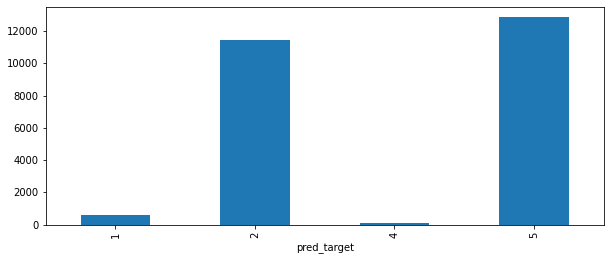

In [ ]:
# 예측값
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))